In [247]:
import warnings
warnings.filterwarnings('ignore')
import random
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [248]:
df_location = pd.read_parquet(r'data\airbnb_madrid_location.parquet')
df_conditions = pd.read_parquet(r'data\airbnb_madrid_conditions.parquet')
df_host = pd.read_parquet(r'data\airbnb_madrid_host.parquet')
df_property = pd.read_parquet(r'data\airbnb_madrid_property.parquet')
df_reviews = pd.read_parquet(r'data\airbnb_madrid_reviews.parquet')

#List of dataframes
dfs = [df_location,df_conditions,df_host,df_property,df_reviews]

#Merge them
df = dfs[0]
for result in dfs[1:]:
    df = pd.merge(df, result, on='id')


print(f' dataset shape: {df.shape}')
print(df.columns)


 dataset shape: (21020, 52)
Index(['id', 'neighbourhood', 'neighbourhood_group', 'latitude', 'longitude',
       'dist_km_sol', 'dist_km_airport', 'price', 'minimum_nights',
       'maximum_nights', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified',
       'host_verifications_email', 'host_verifications_phone',
       'host_verifications_reviews', 'host_verifications_facebook',
       'host_verifications_government_id', 'calculated_host_listings_count',
       'host_seniority', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities_wifi_internet',
       'amenities_tv', 'amenities_air_conditioning', 'amenities_heating',
       'amenities_kitchen', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       're

### Contexto
Armar un poco de historia, explicar total properties, barrios totales, disftribución, etc.

In [249]:

df['property_type'].sort_values(ascending=False).unique()

array(['villa', 'townhouse', 'tiny_house', 'tent', 'serviced_apartment',
       'pension_south_korea_', 'other', 'nature_lodge', 'loft', 'igloo',
       'hut', 'house', 'hotel', 'hostel', 'guesthouse', 'guest_suite',
       'farm_stay', 'earth_house', 'dome_house', 'condominium', 'chalet',
       'cave', 'casa_particular_cuba_', 'camper_rv', 'bungalow',
       'boutique_hotel', 'bed_and_breakfast', 'barn', 'apartment',
       'aparthotel'], dtype=object)

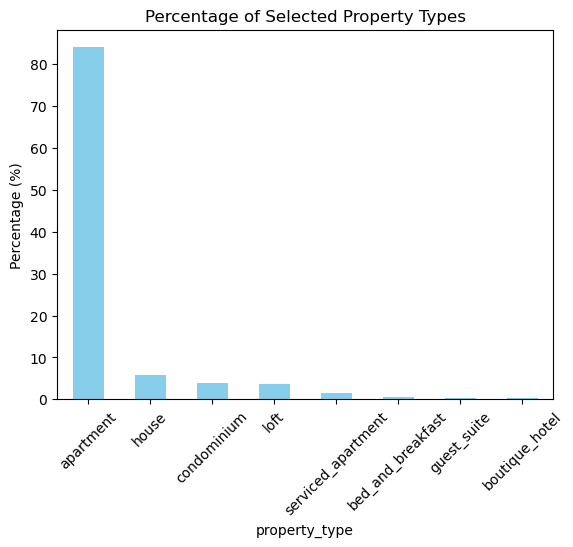

In [250]:
propiedad = ['apartment','house','condominium','loft','serviced_apartment','bed_and_breakfast','guest_suite','boutique_hotel']


df_ = df[df['property_type'].isin(propiedad)]
value_counts = df_['property_type'].value_counts(normalize=True)*100

# df_filtrado.columns = ['property_type','count']
# sns.barplot(
#     data=df_filtrado,
#     x='property_type',
#     y='count'
# )
# Plot the percentages as a bar chart
value_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.ylabel('Percentage (%)')
plt.title('Percentage of Selected Property Types')
plt.xticks(rotation=45)
plt.show()


In [251]:
df_property_type = df['property_type'].value_counts()
(df_property_type / df_property_type.sum()).sort_values(ascending=False)*100


property_type
apartment                81.731684
house                     5.551855
condominium               3.805899
loft                      3.472883
serviced_apartment        1.384396
hostel                    0.932445
bed_and_breakfast         0.566127
guest_suite               0.371075
boutique_hotel            0.333016
other                     0.323501
guesthouse                0.313987
townhouse                 0.290200
chalet                    0.223597
hotel                     0.223597
tiny_house                0.104662
casa_particular_cuba_     0.095147
camper_rv                 0.090390
villa                     0.047574
dome_house                0.028544
aparthotel                0.028544
barn                      0.014272
hut                       0.014272
earth_house               0.014272
bungalow                  0.009515
farm_stay                 0.004757
tent                      0.004757
pension_south_korea_      0.004757
cave                      0.004757
nature

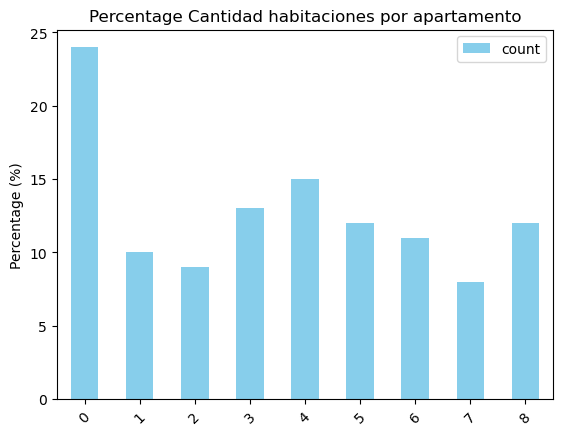

In [328]:
#Filtro por cantidad de camas, por tipo de apartamento y precio

df_apartamentos = df.loc[(df['bedrooms'].between(1,3)) & (df['property_type'] == 'apartment') & (df.price.between(0,200))]
df_apart =  df.loc[(df['bedrooms'].between(1,3)) & (df['property_type'] == 'apartment')]

# & df.loc[df['property_type'] == 'apartment']
df.shape
cantidad_habitaciones = df_apartamentos.bedrooms.value_counts(normalize=True)*100



cantidad_habitaciones.plot(kind='bar', color='skyblue')

# Add labels and title
plt.ylabel('Percentage (%)')
plt.title('Percentage Cantidad habitaciones por apartamento')
plt.xticks(rotation=45)
plt.show()


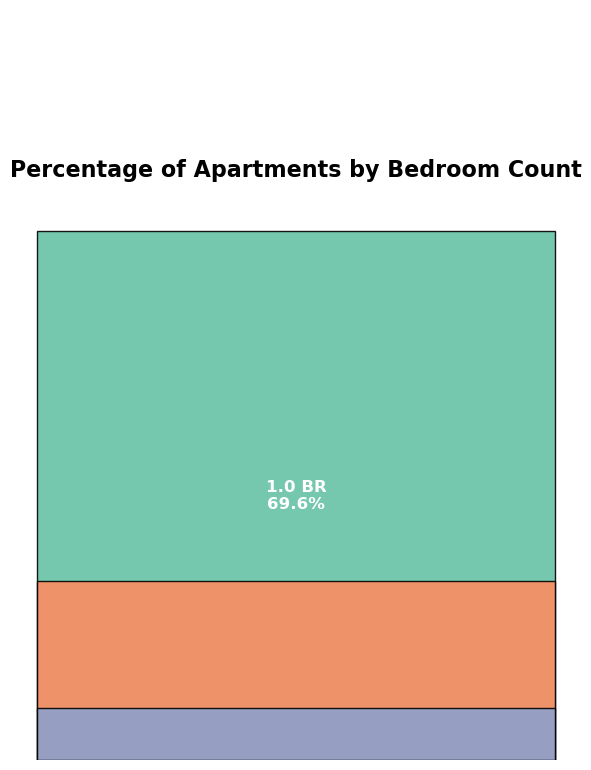

In [337]:
# Count the occurrences of each unique number of bedrooms and calculate percentages
bedroom_counts = df_apartamentos['bedrooms'].value_counts(normalize=True) * 100

# Sort the values by the number of bedrooms (optional)
bedroom_counts = bedroom_counts.sort_index()

# Colors for each section of the bar
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3']  # More vibrant colors

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(6, 8))  # Adjust the figure size

# Plot a single vertical bar with stacked sections
ax.bar('Bedrooms', bedroom_counts.values, color=colors, edgecolor='black', width=0.5, alpha=0.9)

# Annotate each section with the percentage and bedroom count
cumulative = 0
for i, (value, label) in enumerate(zip(bedroom_counts.values, bedroom_counts.index)):
    cumulative += value
    ax.text('Bedrooms', cumulative - value / 2, f'{label} BR\n{value:.1f}%', va='center', ha='center', 
            fontsize=12, color='white', fontweight='bold')

# Customization for a cleaner look
ax.set_title('Percentage of Apartments by Bedroom Count', fontsize=16, pad=20, fontweight='bold')
ax.set_xticks([])  # Hide x-axis ticks
ax.set_yticks([])  # Hide y-axis ticks
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)  # Remove axis spines

# Add gridlines behind the bars (optional)
ax.grid(False)  # If you want gridlines, use ax.grid(True, axis='y', linestyle='--')

# Show the plot
plt.tight_layout()
plt.show()

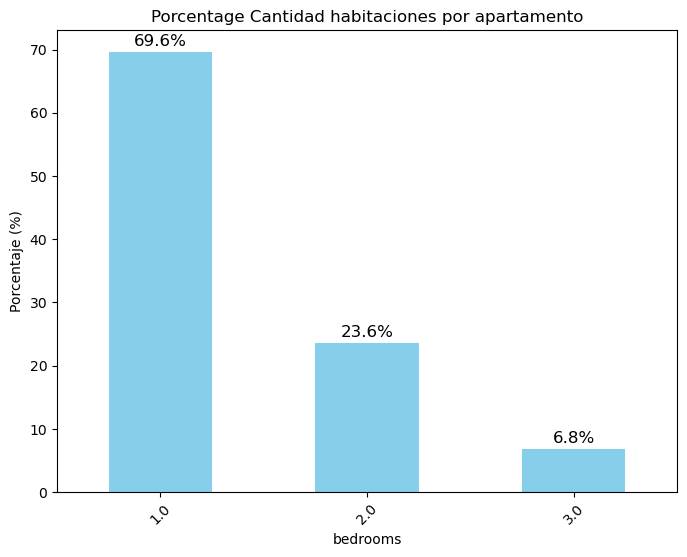

In [346]:
bedroom_counts = df_apartamentos['bedrooms'].value_counts(normalize=True) * 100

bedroom_counts.plot(kind='bar', color='skyblue')

# Create a bar plot
ax = bedroom_counts.plot(kind='bar', color='skyblue', figsize=(8, 6))

# Add labels and title
plt.ylabel('Porcentaje (%)')
plt.title('Porcentage Cantidad habitaciones por apartamento')
plt.xticks(rotation=45)

# Add percentage labels on top of each bar
for i, value in enumerate(bedroom_counts):
    ax.text(i, value + 1, f'{value:.1f}%', ha='center', fontsize=12)

plt.show()

In [253]:
print(f'Puro sin ningun filtro {df.shape}')
print(f'Mi primer filtrado, con rango de dinero en precio entre 80 y 400 {df_apartamentos.shape}')
print(f'Filtrado con rangos ya estipulados, incluyendo valores minimos {df_apart.shape}')

Puro sin ningun filtro (21020, 52)
Mi primer filtrado, con rango de dinero en precio entre 80 y 400 (14437, 52)
Filtrado con rangos ya estipulados, incluyendo valores minimos (15651, 52)


In [254]:
#Set prices with ranges
bins = [80, 100, 120, 150, 200, 300, 500, 1000]
labels = ['80-120','121-150','151-180','181-210','211-240','241-300','301-400']

# Create a new column 'price_range' based on the bins
df_apartamentos['price_range'] = pd.cut(df_apartamentos['price'], bins=bins, labels=labels)

In [255]:
#Version 2 de rangos. comparar cuales quedarían mejor

bins = [0, 50, 100, 150, 200]
labels = ['0-50', '51-100', '101-150', '151-200']


# Create a new column 'price_range' based on the bins
df_apart['price_range'] = pd.cut(df_apart['price'], bins=bins, labels=labels)
df_apart

,id,neighbourhood,neighbourhood_group,latitude,longitude,dist_km_sol,dist_km_airport,price,minimum_nights,maximum_nights,...,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,days_since_last_review,days_since_first_review,number_of_reviews_en,number_of_reviews_es,number_of_reviews_otros,price_range
0,0,Chamartín,Chamartín,40.45628,-3.67763,6.769415,11.162062,70.0,1,365,...,10.0,9.0,10.0,0.61,28,3589,65.0,5.0,3.0,51-100
1,1,Aluche,Latina,40.40341,-3.74084,4.433720,18.198818,17.0,4,40,...,10.0,8.0,9.0,0.52,544,1918,17.0,12.0,4.0,0-50
2,2,Legazpi,Arganzuela,40.38695,-3.69304,4.552379,15.799212,50.0,15,730,...,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN,0-50
4,4,Justicia,Centro,40.41995,-3.69764,2.317480,13.364384,115.0,3,10,...,10.0,10.0,10.0,0.64,33,3144,37.0,23.0,7.0,101-150
6,6,Sol,Centro,40.41552,-3.70346,0.104131,14.106658,65.0,5,180,...,10.0,10.0,10.0,1.47,46,3475,133.0,23.0,14.0,51-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21014,21359,San Blas,San Blas - Canillejas,40.44039,-3.57575,14.384648,5.652680,23.0,2,30,...,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN,0-50
21015,21360,Centro,Centro,40.42623,-3.71067,2.139367,14.415525,30.0,1,4,...,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN,0-50
21017,21363,Palacio,Centro,40.42049,-3.70910,1.307754,14.138335,59.0,25,1125,...,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN,51-100
21018,21364,La Latina,Centro,40.41241,-3.70854,1.192563,14.628332,49.0,1,30,...,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN,0-50


### Definir variables a modo insight

In [256]:
#Calculo de las métricas estándar
# print(f'la media de precio es {df.price.mean()}')
# print(f'la mediana de precio es {df.price.median()}')
# print(f'la moda de precio es {df.price.mode()[0]}')

In [257]:
#Calculo los Quantiles
price_q_25 = df.price.quantile(0.25)
price_q_50 = df.price.quantile(0.50)
price_q_75 = df.price.quantile(0.75)

print(f'El precio de corte < 25 es {price_q_25}')
print(f'El precio de corte = 50 es {price_q_50}')
print(f'El precio de corte > 75 es {price_q_75}')

El precio de corte < 25 es 40.0
El precio de corte = 50 es 65.0
El precio de corte > 75 es 102.0


## Apartamentos 
Me centro en el property type apartamento, ya que es el cual me quiero centrar

In [258]:
df['target'] = (df['bedrooms'].between(1,3)) & (df['property_type'] == 'apartment') & (df.price < 200)
df.head()



,id,neighbourhood,neighbourhood_group,latitude,longitude,dist_km_sol,dist_km_airport,price,minimum_nights,maximum_nights,...,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,days_since_last_review,days_since_first_review,number_of_reviews_en,number_of_reviews_es,number_of_reviews_otros,target
0,0,Chamartín,Chamartín,40.45628,-3.67763,6.769415,11.162062,70.0,1,365,...,10.0,9.0,10.0,0.61,28,3589,65.0,5.0,3.0,True
1,1,Aluche,Latina,40.40341,-3.74084,4.433720,18.198818,17.0,4,40,...,10.0,8.0,9.0,0.52,544,1918,17.0,12.0,4.0,True
2,2,Legazpi,Arganzuela,40.38695,-3.69304,4.552379,15.799212,50.0,15,730,...,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN,True
3,3,Malasaña,Centro,40.42202,-3.70395,1.848181,14.020964,80.0,5,730,...,10.0,10.0,10.0,0.14,7,1868,6.0,2.0,1.0,False
4,4,Justicia,Centro,40.41995,-3.69764,2.317480,13.364384,115.0,3,10,...,10.0,10.0,10.0,0.64,33,3144,37.0,23.0,7.0,True


In [259]:
#Calculo de las métricas estándar
print(f'la media de precio es {df_apartamentos.price.mean()}')
print(f'la mediana de precio es {df_apartamentos.price.median()}')
print(f'la moda de precio es {df_apartamentos.price.mode()[0]}')

la media de precio es 69.79905797603381
la mediana de precio es 60.0
la moda de precio es 50.0


In [260]:
#Calculo los Quantiles
price_q_25 = df_apartamentos.price.quantile(0.25)
price_q_50 = df_apartamentos.price.quantile(0.50)
price_q_75 = df_apartamentos.price.quantile(0.75)

print(f'El precio de corte < 25 es {price_q_25}')
print(f'El precio de corte = 50 es {price_q_50}')
print(f'El precio de corte > 75 es {price_q_75}')


El precio de corte < 25 es 38.0
El precio de corte = 50 es 60.0
El precio de corte > 75 es 90.0


<Axes: ylabel='price'>

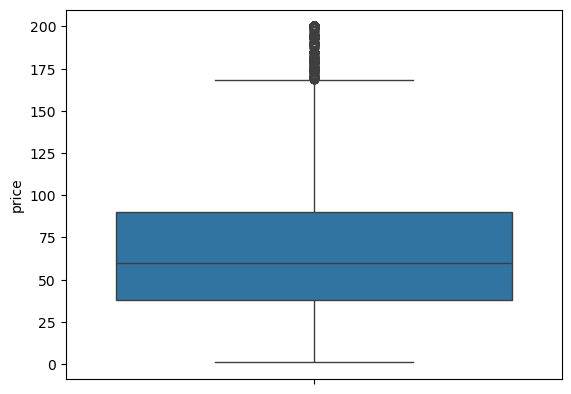

In [261]:
sns.boxplot(
    data=df_apartamentos,
    y='price'
)

### Bases
- Apartamentos
- 1,2,3 Habitaciones
- Precio entre 80€ y 400€ la noche. Representan 1/3 de mis apartamentos

### Hipótesis
- ``H 1``: el precio de un piso ``top_20`` depende de la situación del ``Host``
    - ``q 1``: SuperHost
    - ``q 2``: Validado por el Gobierno
    - ``q 3``: La cara del Host es visible? Importancia que le da a la confianza?
- ``H 2``: el precio de un piso ``top_20`` depende de ``Ubicación``, más que nada para tener un pantallazo general
    - ``q 1``: Dónde está ubicado. Barrio caro, barrio barato?
    - ``q 2``: Distancia de puerta del sol
    - ``q 3``: 
- ``H 3``: el precio de un piso ``top_20`` depende de ``tipo de propiedad``
    - ``q 1``: Si es una Casa, un apartamento, un duplex
    - ``q 2``: Húespedes que se pueden alojar
        - ``q 2.1``: Tipo de Habitación, compartida o individual
        - ``q 2.2``: Cantidad de Habitaciones por piso, es decir serían pisos más grandes
    - ``q 3``: Cantidad de baños
    - ``q 4``: Wifi
    - ``q 5``: AC
    - ``q 6``: Heating
    - ``q 7``: TV
    - ``q 8``: Kitchen


- ``H 4``: el precio de un piso ``top_20`` depende de las condiciones de contratación
    - ``q 1``: Políticas de Cancelación, cuantos días antes
    - ``q 2``: host_identity_verified
    - ``q 3``: Influye la llamada de verificación?
    - ``q 4``: ¿El mínimo de noches ya compromete al inquilino a pagar más?

- ``H 5``: el precio de un piso ``top_20`` depende de las reviews?
    - ``q 1``: El number de reviews totales juega un papel importante? Y las recibidas el último año?
    - ``q 2``: Influye el rating al precio? A mayor rating mayor precio ofrecido? 
    - ``q 3``: Piso limpio, habla bien del host? ``review_scores_cleanliness``
    - ``q 4``: a que nos referimos con las puntuaciones de valor? Tienen mayor relevancia?
    - ``q 5``: tener un check-in sencillo hace que la gente quiera pagar un precio mayor? ``review_scores_checkin``

- ``H 1``: el precio de un piso ``top_20`` depende de la situación del ``Host``
    - ``q 1``: SuperHost
    - ``q 2``: Validado por el Gobierno
    - ``q 3``: La cara del Host es visible? Importancia que le da a la confianza?

In [262]:
df_apartamentos.transpose()

,0,1,2,4,6,8,9,11,12,13,...,21004,21007,21011,21012,21013,21014,21015,21017,21018,21019
id,0,1,2,4,6,8,9,11,12,13,...,21349,21352,21356,21357,21358,21359,21360,21363,21364,21365
neighbourhood,Chamartín,Aluche,Legazpi,Justicia,Sol,Justicia,Centro,Centro,Fuencarral-el Pardo,Malasaña,...,Centro,Centro,Delicias,Usera,Arganzuela,San Blas,Centro,Palacio,La Latina,Chamberí
neighbourhood_group,Chamartín,Latina,Arganzuela,Centro,Centro,Centro,Centro,Centro,Fuencarral - El Pardo,Centro,...,Centro,Centro,Arganzuela,Usera,Arganzuela,San Blas - Canillejas,Centro,Centro,Centro,Chamberí
latitude,40.45628,40.40341,40.38695,40.41995,40.41552,40.41978,40.42096,40.4208,40.48409,40.42365,...,40.41191,40.41198,40.39756,40.38751,40.40407,40.44039,40.42623,40.42049,40.41241,40.43072
longitude,-3.67763,-3.74084,-3.69304,-3.69764,-3.70346,-3.6973,-3.70428,-3.69878,-3.72257,-3.70889,...,-3.7027,-3.70208,-3.69642,-3.70014,-3.71465,-3.57575,-3.71067,-3.7091,-3.70854,-3.71002
dist_km_sol,6.769415,4.43372,4.552379,2.31748,0.104131,2.336413,1.67399,2.38296,9.381644,1.768577,...,1.651029,1.772249,3.176953,4.698639,2.45104,14.384648,2.139367,1.307754,1.192563,2.80089
dist_km_airport,11.162062,18.198818,15.799212,13.364384,14.106658,13.383317,13.846773,13.429864,14.683592,14.459907,...,14.440701,14.515752,15.668061,16.795263,15.886809,5.65268,14.415525,14.138335,14.628332,14.247742
price,70.0,17.0,50.0,115.0,65.0,55.0,90.0,45.0,20.0,65.0,...,65.0,65.0,15.0,28.0,35.0,23.0,30.0,59.0,49.0,22.0
minimum_nights,1,4,15,3,5,3,3,1,2,5,...,2,2,1,1,2,2,1,25,1,2
maximum_nights,365,40,730,10,180,365,180,30,1125,365,...,90,90,1125,90,1125,30,4,1125,30,1125


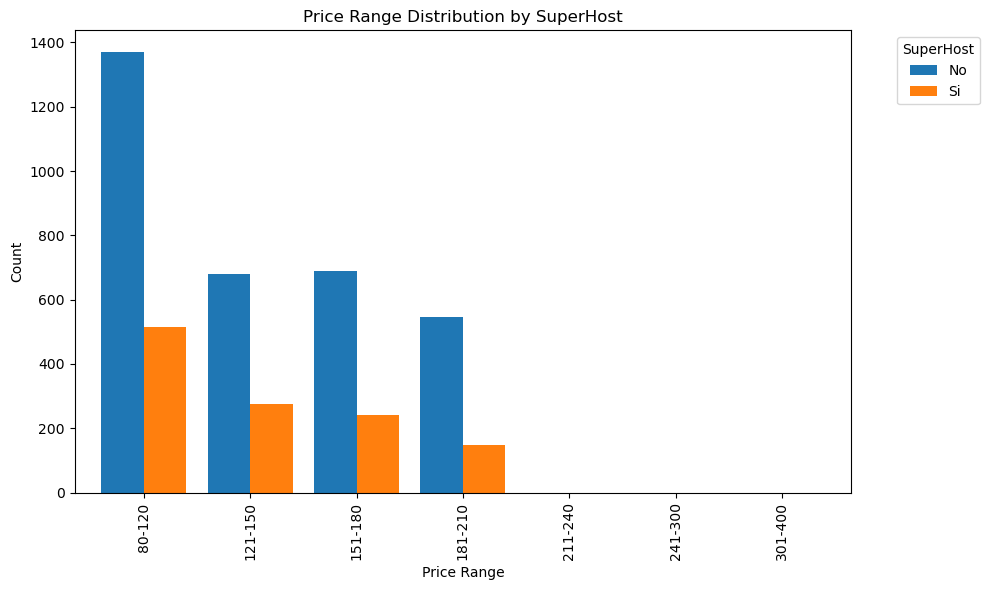

In [263]:
grouped_data = df_apartamentos.groupby(['host_is_superhost', 'price_range']).size().reset_index(name='counts')

# Step 3: Pivot the DataFrame for easier plotting
pivot_df = grouped_data.pivot(index='price_range', columns='host_is_superhost', values='counts')

# Step 4: Plot the data
pivot_df.plot(kind='bar', figsize=(10, 6), width=0.8)

# Add titles and labels
plt.title('Price Range Distribution by SuperHost')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='SuperHost', bbox_to_anchor=(1.05, 1), loc='upper left', labels=['No','Si'])

# Show the plot
plt.tight_layout()
plt.show()




# # calcular el número de pisos con respecto a su precio y si son o no son Superhost
# df_mod_ = df_apartamentos.groupby(["host_is_superhost",'price_range'], as_index=False).size()
# # relativizar conteos en cada grupo
# df_mod_["size"] = df_mod_.groupby("host_is_superhost")["size"].transform(lambda x: x / x.sum())
# # lineplot
# sns.lineplot(
#     data=df_mod_,
#     x="price_range",
#     y="size",
#     hue="host_is_superhost",
    
# )

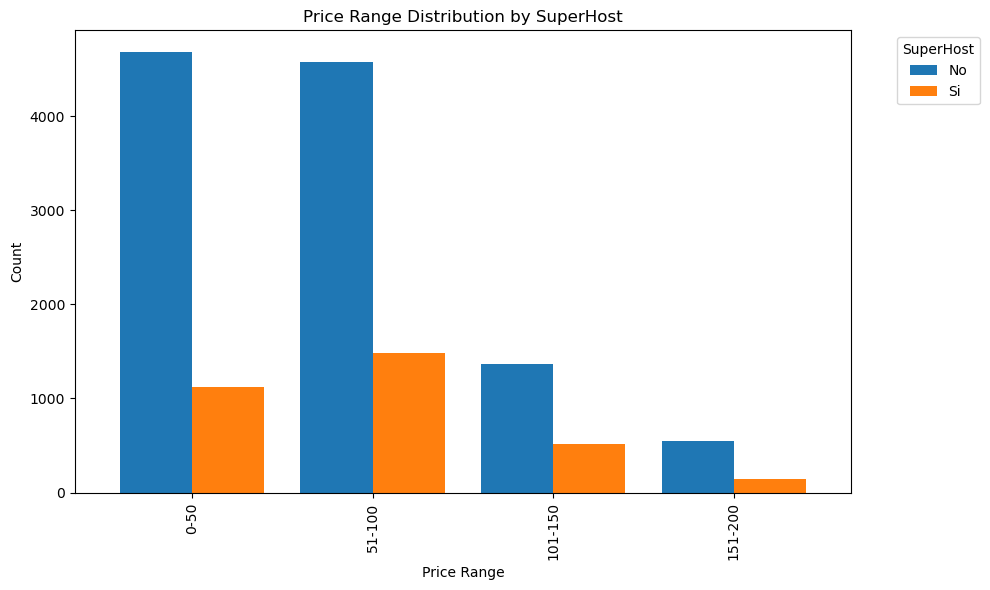

In [264]:
#Versión 2
grouped_data = df_apart.groupby(['host_is_superhost', 'price_range']).size().reset_index(name='counts')

# Step 3: Pivot the DataFrame for easier plotting
pivot_df = grouped_data.pivot(index='price_range', columns='host_is_superhost', values='counts')

# Step 4: Plot the data
pivot_df.plot(kind='bar', figsize=(10, 6), width=0.8)

# Add titles and labels
plt.title('Price Range Distribution by SuperHost')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='SuperHost', bbox_to_anchor=(1.05, 1), loc='upper left', labels=['No','Si'])

# Show the plot
plt.tight_layout()
plt.show()


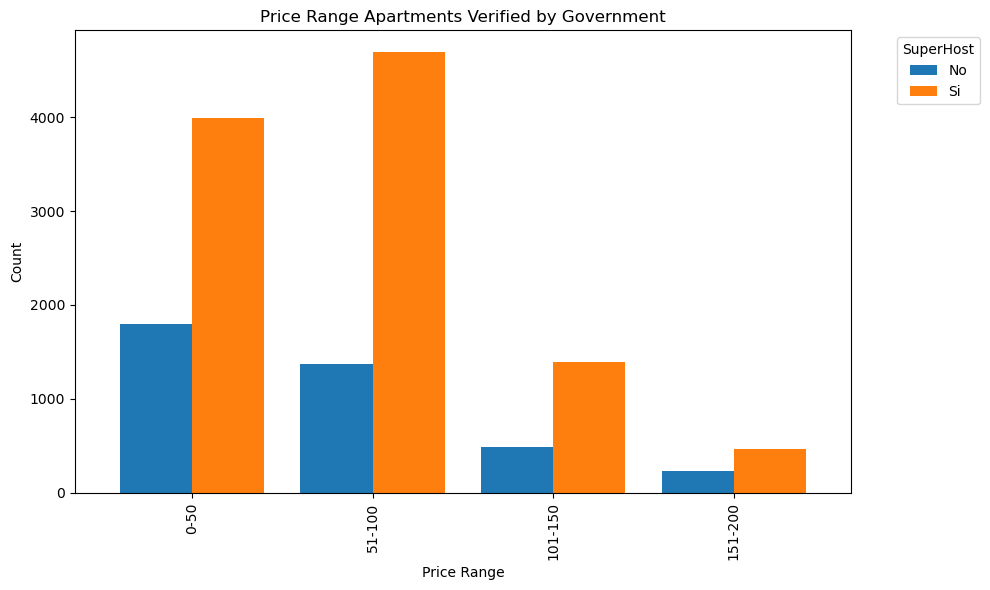

In [298]:
#Versión 2
grouped_data = df_apart.groupby(['host_verifications_government_id', 'price_range']).size().reset_index(name='counts')

# Step 3: Pivot the DataFrame for easier plotting
pivot_df = grouped_data.pivot(index='price_range', columns='host_verifications_government_id', values='counts')

# Step 4: Plot the data
pivot_df.plot(kind='bar', figsize=(10, 6), width=0.8)

# Add titles and labels
plt.title('Price Range Apartments Verified by Government')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='SuperHost', bbox_to_anchor=(1.05, 1), loc='upper left', labels=['No','Si'])

# Show the plot
plt.tight_layout()
plt.show()

<Axes: xlabel='host_is_superhost', ylabel='price'>

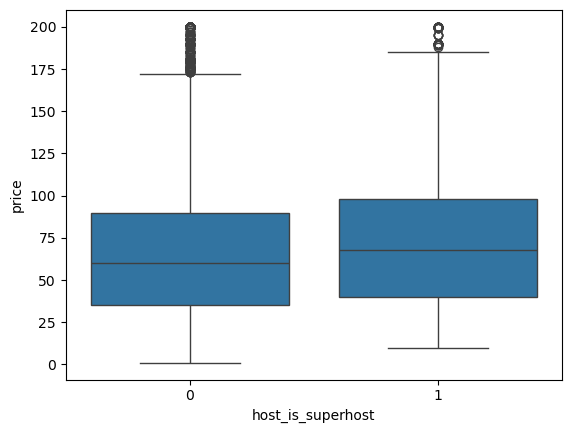

In [265]:
sns.boxplot(
    data=df_apartamentos,
    y='price',
    x='host_is_superhost',
    fill=True
)

<Axes: xlabel='host_verifications_government_id', ylabel='price'>

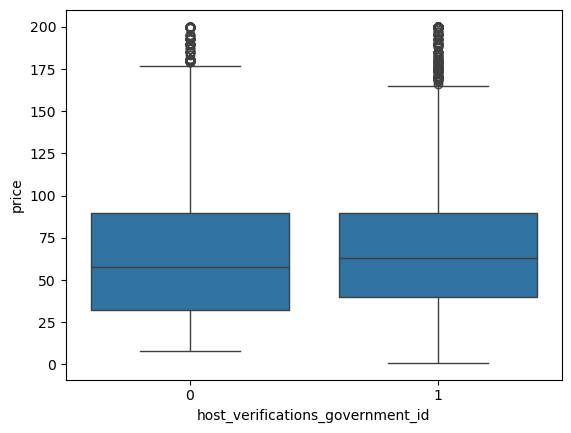

In [266]:
sns.boxplot(
    data=df_apartamentos,
    y='price',
    x='host_verifications_government_id'
)



<Axes: xlabel='host_has_profile_pic', ylabel='price'>

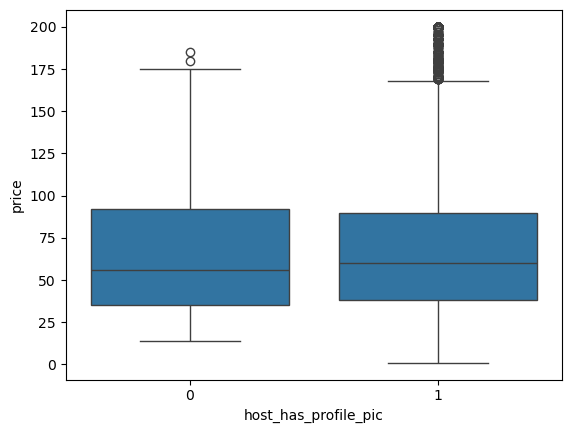

In [267]:
sns.boxplot(
    data=df_apartamentos,
    y='price',
    x='host_has_profile_pic'
)

In [268]:
df.head()

,id,neighbourhood,neighbourhood_group,latitude,longitude,dist_km_sol,dist_km_airport,price,minimum_nights,maximum_nights,...,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,days_since_last_review,days_since_first_review,number_of_reviews_en,number_of_reviews_es,number_of_reviews_otros,target
0,0,Chamartín,Chamartín,40.45628,-3.67763,6.769415,11.162062,70.0,1,365,...,10.0,9.0,10.0,0.61,28,3589,65.0,5.0,3.0,True
1,1,Aluche,Latina,40.40341,-3.74084,4.433720,18.198818,17.0,4,40,...,10.0,8.0,9.0,0.52,544,1918,17.0,12.0,4.0,True
2,2,Legazpi,Arganzuela,40.38695,-3.69304,4.552379,15.799212,50.0,15,730,...,NaN,NaN,NaN,NaN,-1,-1,NaN,NaN,NaN,True
3,3,Malasaña,Centro,40.42202,-3.70395,1.848181,14.020964,80.0,5,730,...,10.0,10.0,10.0,0.14,7,1868,6.0,2.0,1.0,False
4,4,Justicia,Centro,40.41995,-3.69764,2.317480,13.364384,115.0,3,10,...,10.0,10.0,10.0,0.64,33,3144,37.0,23.0,7.0,True


In [269]:
#q1 Superhost, cuantos son superhost?

df_apartamentos.groupby('host_is_superhost')['price'].value_counts(ascending=True)

host_is_superhost  price
0                  1.0        1
                   126.0      1
                   131.0      1
                   152.0      1
                   156.0      1
                           ... 
1                  90.0     106
                   70.0     112
                   50.0     113
                   60.0     114
                   75.0     118
Name: count, Length: 355, dtype: int64

- ``H 2``: el precio de un piso ``top_20`` depende de ``Ubicación``, más que nada para tener un pantallazo general
    - ``q 1``: Dónde está ubicado. Barrio caro, barrio barato?
    - ``q 2``: Distancia de puerta del sol

In [270]:
top_barrios = (
    df
    .value_counts('neighbourhood_group')
    .sort_values(ascending=False)
    .to_frame(name='n')
    .query("n > 10")
    .index
    )
# filtramos los barrios y contamos la proporción de pisos top vs no-top
df_ = (
    df
    .query('neighbourhood_group.isin(@top_barrios)')
    .groupby('neighbourhood_group',as_index=False)
    .value_counts(['target'], normalize=True)
    .sort_values('proportion')
)
#barplot
px.bar(
    data_frame=df_,
    x='proportion',
    y='neighbourhood_group',
    color='target',
    barmode='relative'
)

In [347]:
#Distancia dde Puerta del Sol

px.box(
    data_frame=df,
    x="target",
    y="dist_km_sol",
    color="target",
)

In [348]:
#Distancia dde Aeropuerto

px.box(
    data_frame=df,
    x="target",
    y="dist_km_airport",
    color="target",
)

- ``H 3``: el precio de un piso ``top_20`` depende de ``tipo de propiedad``
    - ``q 1``: Si es una Casa, un apartamento, un duplex
    - ``q 2``: Húespedes que se pueden alojar
        - ``q 2.1``: Tipo de Habitación, compartida o individual
        - ``q 2.2``: Cantidad de Habitaciones por piso, es decir serían pisos más grandes
    - ``q 3``: Cantidad de baños
    - ``q 4``: Wifi
    - ``q 5``: AC
    - ``q 6``: Heating
    - ``q 7``: TV
    - ``q 8``: Kitchen

In [273]:
df_apartamentos.columns

Index(['id', 'neighbourhood', 'neighbourhood_group', 'latitude', 'longitude',
       'dist_km_sol', 'dist_km_airport', 'price', 'minimum_nights',
       'maximum_nights', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified',
       'host_verifications_email', 'host_verifications_phone',
       'host_verifications_reviews', 'host_verifications_facebook',
       'host_verifications_government_id', 'calculated_host_listings_count',
       'host_seniority', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities_wifi_internet',
       'amenities_tv', 'amenities_air_conditioning', 'amenities_heating',
       'amenities_kitchen', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'r

In [274]:
# #Copy with general ranges

# amenities = ['amenities_wifi_internet','amenities_tv', 'amenities_air_conditioning', 'amenities_heating','amenities_kitchen']

# # Step 2: Loop through amenities and plot price range distributions
# for amenity in amenities:
#     # Group by the amenity and price_range, and count occurrences
#     grouped_data = df.groupby([amenity, 'price_range']).size().reset_index(name='counts')
    
#     # Pivot the DataFrame for easier plotting (True/False for the amenity as columns)
#     pivot_df = grouped_data.pivot(index='price_range', columns=amenity, values='counts')

#     # Step 3: Plot the data
#     pivot_df.plot(kind='bar', figsize=(10, 6), width=0.8)

#     # Add titles and labels
#     plt.title(f'Price Range Distribution by {amenity.replace("_", " ").title()}')
#     plt.xlabel('Price Range')
#     plt.ylabel('Count')
#     plt.legend(title=amenity.replace("_", " ").title(), bbox_to_anchor=(1.05, 1), loc='upper left', labels=['No','Si'])

#     # Show the plot
#     plt.tight_layout()
#     plt.show()

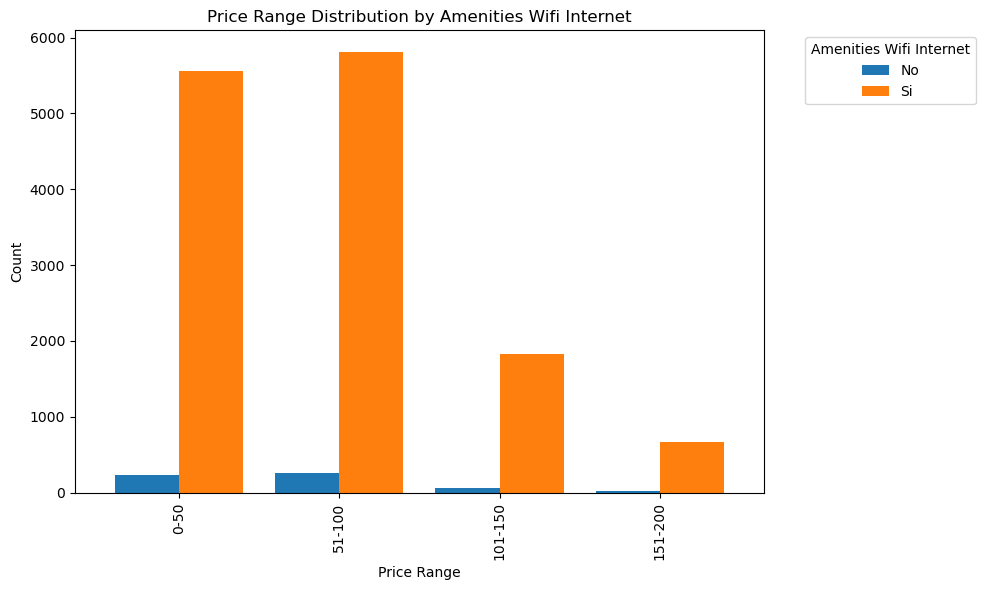

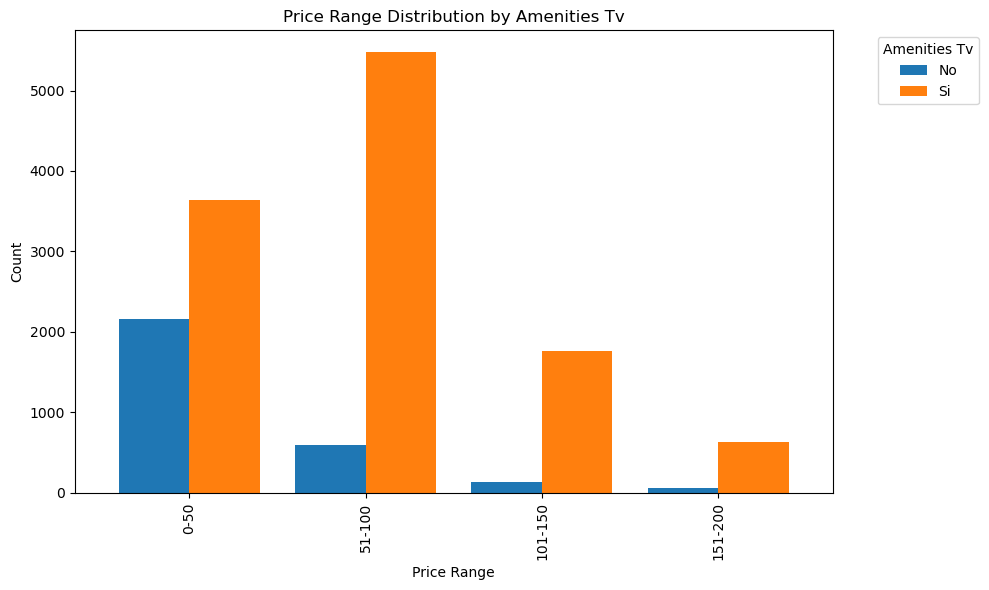

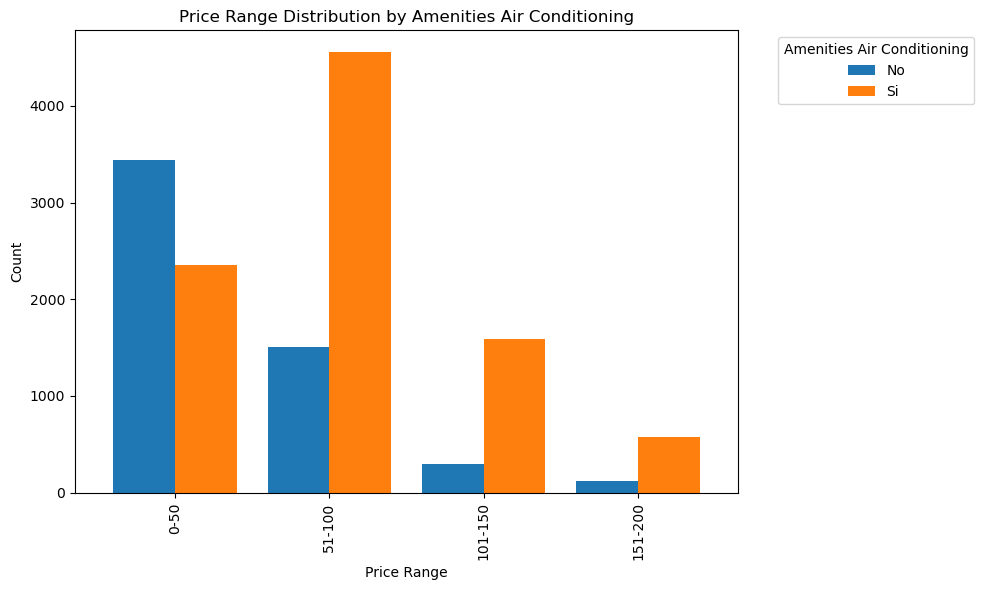

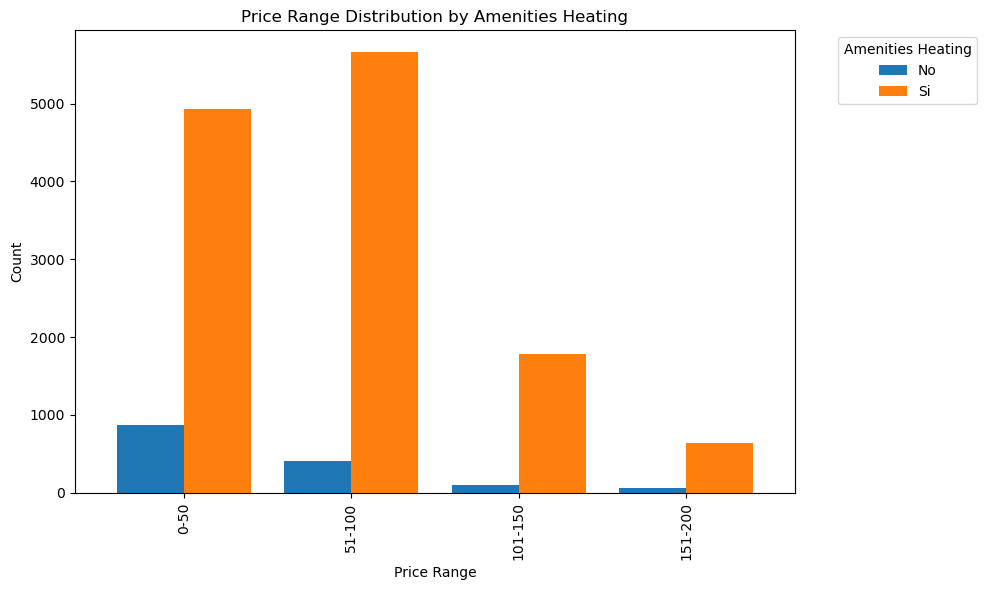

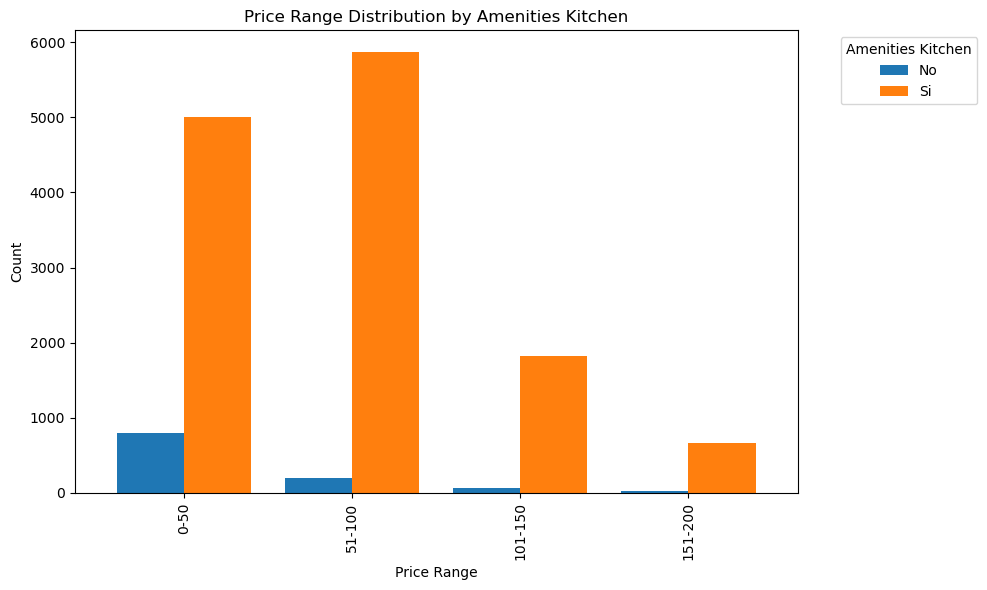

In [275]:
#Copy with general ranges

amenities = ['amenities_wifi_internet','amenities_tv', 'amenities_air_conditioning', 'amenities_heating','amenities_kitchen']

# Step 2: Loop through amenities and plot price range distributions
for amenity in amenities:
    # Group by the amenity and price_range, and count occurrences
    grouped_data = df_apart.groupby([amenity, 'price_range']).size().reset_index(name='counts')
    
    # Pivot the DataFrame for easier plotting (True/False for the amenity as columns)
    pivot_df = grouped_data.pivot(index='price_range', columns=amenity, values='counts')

    # Step 3: Plot the data
    pivot_df.plot(kind='bar', figsize=(10, 6), width=0.8)

    # Add titles and labels
    plt.title(f'Price Range Distribution by {amenity.replace("_", " ").title()}')
    plt.xlabel('Price Range')
    plt.ylabel('Count')
    plt.legend(title=amenity.replace("_", " ").title(), bbox_to_anchor=(1.05, 1), loc='upper left', labels=['No','Si'])

    # Show the plot
    plt.tight_layout()
    plt.show()



In [295]:

# amenities = ['amenities_wifi_internet','amenities_tv', 'amenities_air_conditioning', 'amenities_heating','amenities_kitchen']

# # Step 2: Loop through amenities and plot price range distributions
# for amenity in amenities:
#     # Group by the amenity and price_range, and count occurrences
#     grouped_data = df_apartamentos.groupby([amenity, 'price_range']).size().reset_index(name='counts')
    
#     # Pivot the DataFrame for easier plotting (True/False for the amenity as columns)
#     pivot_df = grouped_data.pivot(index='price_range', columns=amenity, values='counts')

#     # Step 3: Plot the data
#     pivot_df.plot(kind='bar', figsize=(10, 6), width=0.8)

#     # Add titles and labels
#     plt.title(f'Price Range Distribution by {amenity.replace("_", " ").title()}')
#     plt.xlabel('Price Range')
#     plt.ylabel('Count')
#     plt.legend(title=amenity.replace("_", " ").title(), bbox_to_anchor=(1.05, 1), loc='upper left', labels=['No','Si'])

#     # Show the plot
#     plt.tight_layout()
#     plt.show()


# for amenity in amenities:
#     grouped_data = df_apartamentos.groupby([amenity,'price_range']).size().reset_index(name='counts')
        


    #     # Plotting using a bar chart
    # ax[i].bar([f'No {amenity}', amenity], grouped_data, color=['blue', 'lightblue'])
    # ax[i].set_title(f'{amenity} vs Price Range')
    # ax[i].set_ylabel('Price Rance')


# grouped_data = df_apartamentos.groupby([amenities, 'price_range']).size().reset_index(name='counts')

# # Step 3: Pivot the DataFrame for easier plotting
# pivot_df = grouped_data.pivot(index='price_range', columns=amenities, values='counts')

# fig = px.bar(
#     data_frame=pivot_df,
#     x="price_range",
#     y="value",
#     color="price_range",
#     facet_col="variable",
#     facet_col_spacing=0.005,
# )
# fig.show()


# fig, ax = plt.subplots(len(amenities), 1, figsize=(8, 12))

# # Loop through each amenity, calculate the average price, and plot
# for i, amenity in enumerate(amenities):
#     grouped_data = df_apartamentos.groupby(amenity)['price_range'].size().reset_index(name='counts')



#     # pivot_df1 = df_apartamentos.groupby(amenity)['price_range'].mean()
    
#     # Plotting using a bar chart
#     ax[i].bar([f'No {amenity}', amenity], grouped_data)
#     ax[i].set_title(f'{amenity} vs Price')
#     ax[i].set_ylabel(' Price')




# # Step 3: Pivot the DataFrame for easier plotting
# pivot_df = grouped_data.pivot(index='price_range', columns={amenity}, values='counts')

# # Step 4: Plot the data
# pivot_df.plot(kind='bar', figsize=(10, 6), width=0.8)

# # Add titles and labels
# plt.title('Price Range Distribution by Amenity')
# plt.xlabel('Price Range')
# plt.ylabel('Count')
# plt.legend(title={amenity}, bbox_to_anchor=(1.05, 1), loc='upper left')

# # Show the plot
# plt.tight_layout()
# plt.show()


**insights** Tener aire acondicionado puede aumentar mi precio al igual que tener calefacción

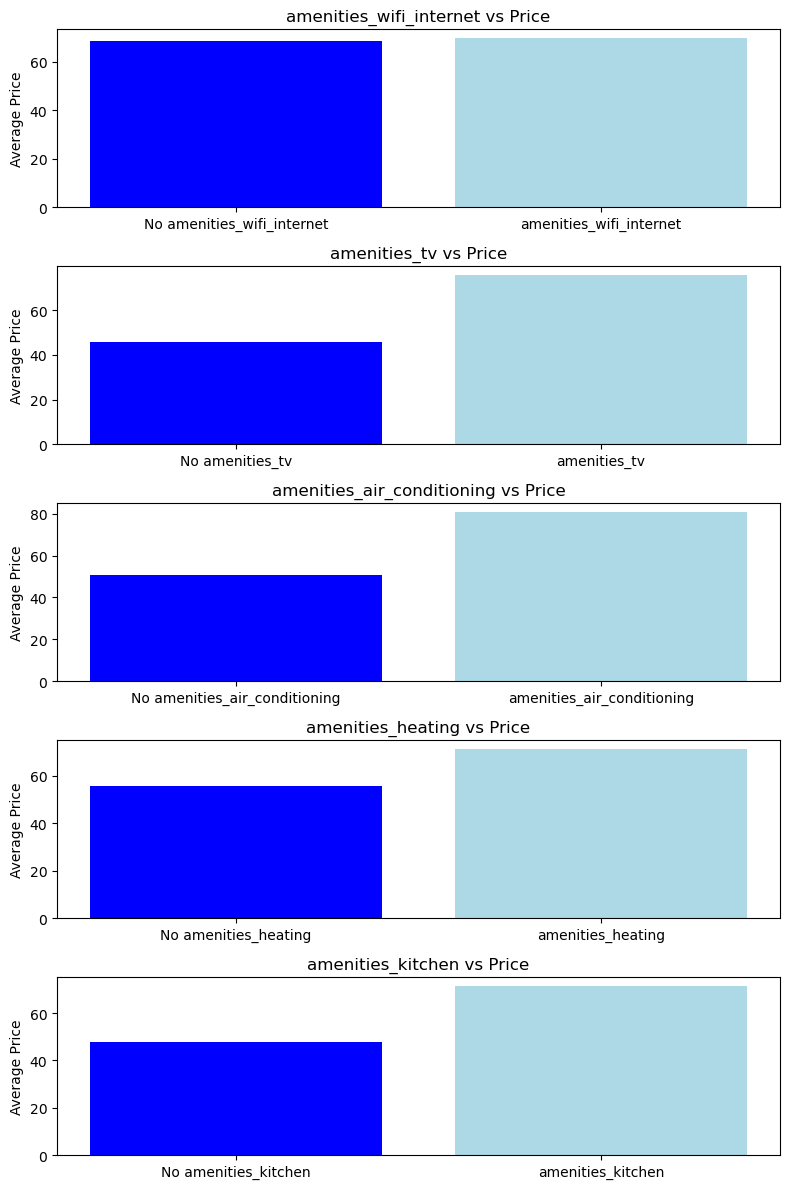

In [277]:
df_apartamentos

amenities = ['amenities_wifi_internet','amenities_tv', 'amenities_air_conditioning', 'amenities_heating','amenities_kitchen' ]

fig, ax = plt.subplots(len(amenities), 1, figsize=(8, 12))

# Loop through each amenity, calculate the average price, and plot
for i, amenity in enumerate(amenities):
    avg_price = df_apartamentos.groupby(amenity)['price'].mean()
    
    # Plotting using a bar chart
    ax[i].bar([f'No {amenity}', amenity], avg_price, color=['blue', 'lightblue'])
    ax[i].set_title(f'{amenity} vs Price')
    ax[i].set_ylabel('Average Price')





# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [278]:
a = df_apartamentos['amenities_wifi_internet'].value_counts()
b = df_apartamentos['amenities_air_conditioning'].value_counts()
c = df_apartamentos['amenities_tv'].value_counts()
d = df_apartamentos['amenities_heating'].value_counts()
e = df_apartamentos['amenities_kitchen'].value_counts()


print(a)
print(b)
print(c)
print(d)
print(e)





amenities_wifi_internet
1    13864
0      573
Name: count, dtype: int64
amenities_air_conditioning
1    9079
0    5358
Name: count, dtype: int64
amenities_tv
1    11507
0     2930
Name: count, dtype: int64
amenities_heating
1    13009
0     1428
Name: count, dtype: int64
amenities_kitchen
1    13362
0     1075
Name: count, dtype: int64


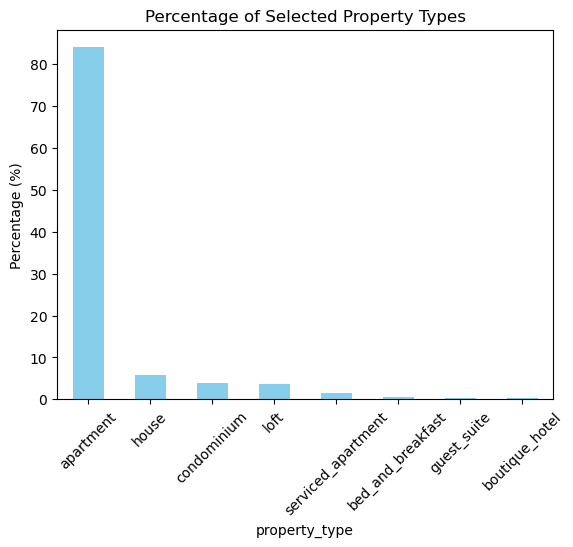

In [279]:
propiedad = ['apartment','house','condominium','loft','serviced_apartment','bed_and_breakfast','guest_suite','boutique_hotel']


df_ = df[df['property_type'].isin(propiedad)]
value_counts = df_['property_type'].value_counts(normalize=True)*100

# df_filtrado.columns = ['property_type','count']
# sns.barplot(
#     data=df_filtrado,
#     x='property_type',
#     y='count'
# )
# Plot the percentages as a bar chart
value_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.ylabel('Percentage (%)')
plt.title('Percentage of Selected Property Types')
plt.xticks(rotation=45)
plt.show()

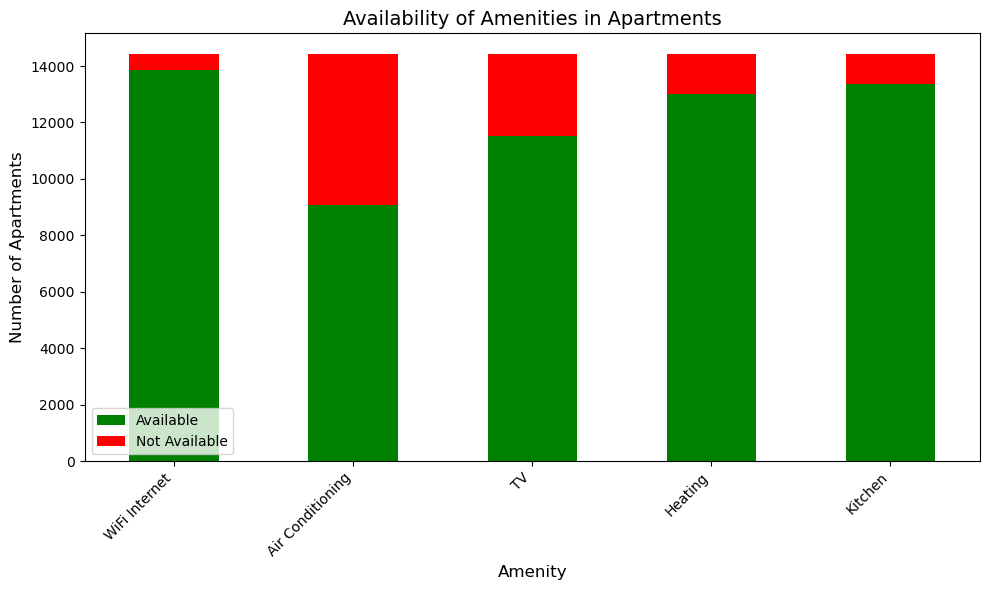

In [280]:
data = {
    'WiFi Internet': [13864, 573],
    'Air Conditioning': [9079, 5358],
    'TV': [11507, 2930],
    'Heating': [13009, 1428],
    'Kitchen': [13362, 1075]
}

# Create a DataFrame where index is 1 (available) and 0 (not available)
df_amenities = pd.DataFrame(data, index=['Available', 'Not Available'])

# Transpose the DataFrame to make the amenities the index
df_amenities = df_amenities.T

# Create a bar plot
df_amenities.plot(kind='bar', stacked=True, color=['Green', 'red'], figsize=(10, 6))

# Add labels and title
plt.title('Availability of Amenities in Apartments', fontsize=14)
plt.xlabel('Amenity', fontsize=12)
plt.ylabel('Number of Apartments', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

``ìnsigths`` en nuestros pisos se puede sacar una ventaja teniendo aire acondicionado

- ``H 4``: el precio de un piso ``top_20`` depende de las condiciones de contratación
    - ``q 1``: Políticas de Cancelación, cuantos días antes
    - ``q 2``: host_identity_verified
    - ``q 3``: Influye la llamada de verificación?
    - ``q 4``: ¿El mínimo de noches ya compromete al inquilino a pagar más?

In [281]:
grouped_df = df_apartamentos.groupby('cancellation_policy')['price'].value_counts().reset_index(name='counts')


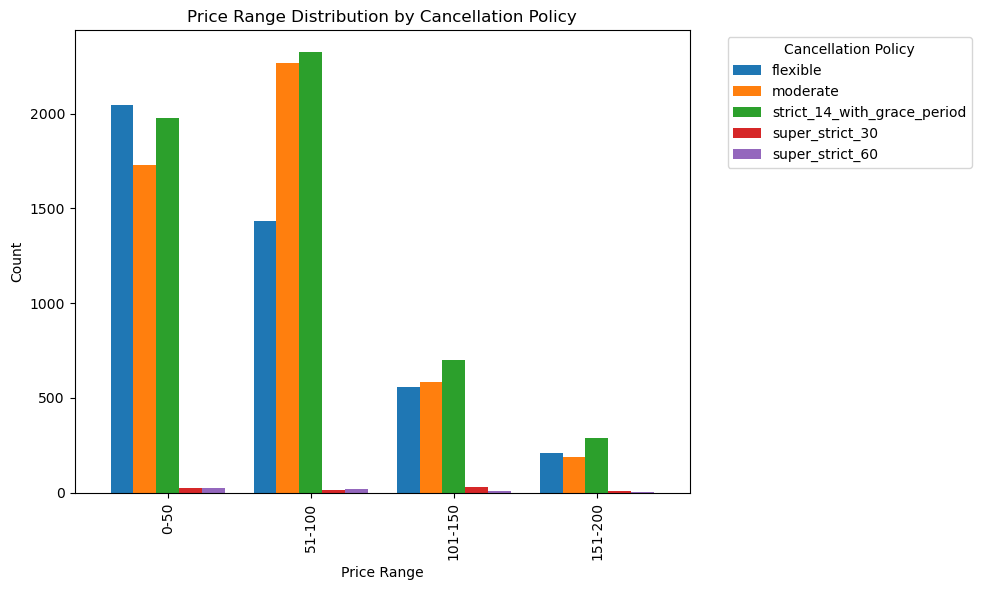

In [282]:
# #Set prices with ranges
# bins = [80, 100, 120, 150, 200, 300, 500, 1000]
# labels = ['80-120','121-150','151-180','181-210','211-240','241-300','301-400']

# # Create a new column 'price_range' based on the bins
# df_apartamentos['price_range'] = pd.cut(df_apartamentos['price'], bins=bins, labels=labels)

# Step 2: Group by 'cancellation_policy' and 'price_range', and count occurrences
grouped_data = df_apart.groupby(['cancellation_policy', 'price_range']).size().reset_index(name='counts')

# Step 3: Pivot the DataFrame for easier plotting
pivot_df = grouped_data.pivot(index='price_range', columns='cancellation_policy', values='counts')

# Step 4: Plot the data
pivot_df.plot(kind='bar', figsize=(10, 6), width=0.8)

# Add titles and labels
plt.title('Price Range Distribution by Cancellation Policy')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='Cancellation Policy', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()


Foto del dueño

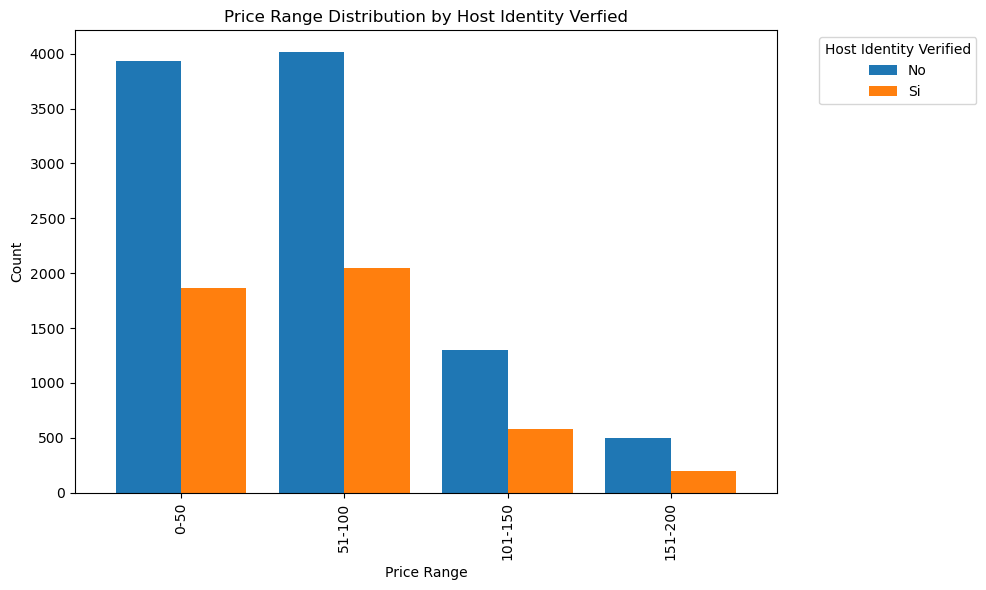

In [283]:
#Versión 2

grouped_data = df_apart.groupby(['host_identity_verified', 'price_range']).size().reset_index(name='counts')

# Step 3: Pivot the DataFrame for easier plotting
pivot_df = grouped_data.pivot(index='price_range', columns='host_identity_verified', values='counts')

# Step 4: Plot the data
pivot_df.plot(kind='bar', figsize=(10, 6), width=0.8)

# Add titles and labels
plt.title('Price Range Distribution by Host Identity Verfied')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='Host Identity Verified', bbox_to_anchor=(1.05, 1), loc='upper left', labels=['No','Si'])

# Show the plot
plt.tight_layout()
plt.show()

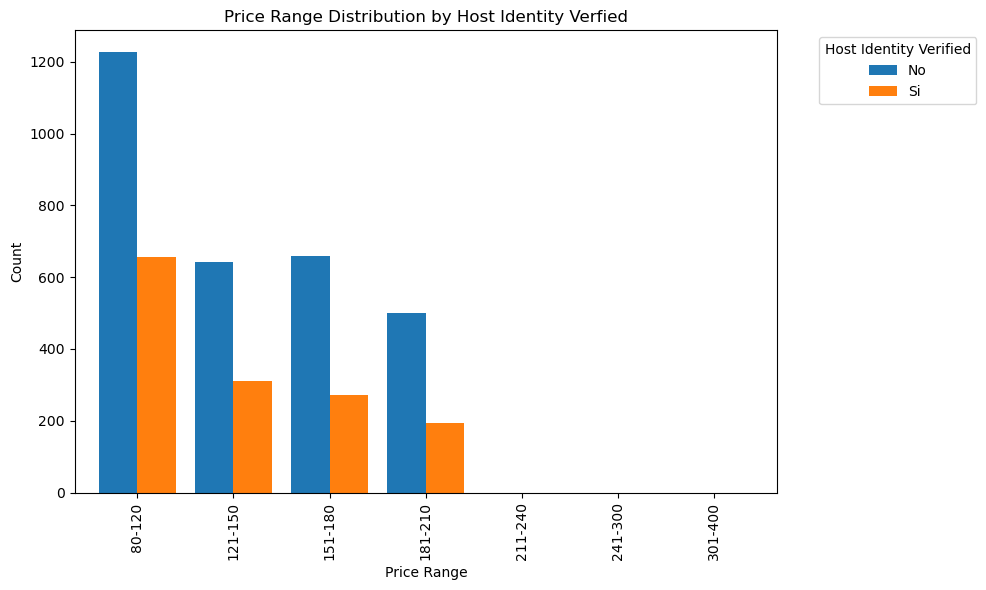

In [284]:
grouped_data = df_apartamentos.groupby(['host_identity_verified', 'price_range']).size().reset_index(name='counts')

# Step 3: Pivot the DataFrame for easier plotting
pivot_df = grouped_data.pivot(index='price_range', columns='host_identity_verified', values='counts')

# Step 4: Plot the data
pivot_df.plot(kind='bar', figsize=(10, 6), width=0.8)

# Add titles and labels
plt.title('Price Range Distribution by Host Identity Verfied')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='Host Identity Verified', bbox_to_anchor=(1.05, 1), loc='upper left', labels=['No','Si'])

# Show the plot
plt.tight_layout()
plt.show()


# Tiene AC

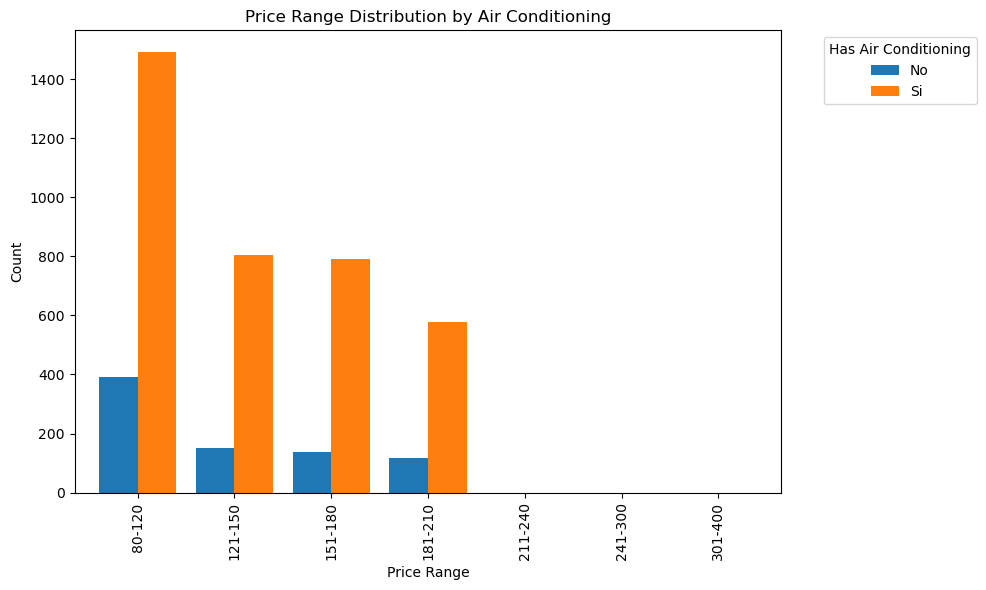

In [285]:
grouped_data = df_apartamentos.groupby(['amenities_air_conditioning', 'price_range']).size().reset_index(name='counts')

# Step 3: Pivot the DataFrame for easier plotting
pivot_df = grouped_data.pivot(index='price_range', columns='amenities_air_conditioning', values='counts')

# Step 4: Plot the data
pivot_df.plot(kind='bar', figsize=(10, 6), width=0.8)

# Add titles and labels
plt.title('Price Range Distribution by Air Conditioning')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='Has Air Conditioning', bbox_to_anchor=(1.05, 1), loc='upper left', labels=['No','Si'])

# Show the plot
plt.tight_layout()
plt.show()

*insigths* vemos quienes tienen aire acondicionado, supone un aumento mayor en el precio

- ``H 5``: el precio de un piso ``top_20`` depende de las reviews?
    - ``q 1``: El number de reviews totales juega un papel importante? Y las recibidas el último año?
    - ``q 2``: Influye el rating al precio? A mayor rating mayor precio ofrecido? 
    - ``q 3``: Piso limpio, habla bien del host? ``review_scores_cleanliness``
    - ``q 4``: a que nos referimos con las puntuaciones de valor? Tienen mayor relevancia?
    - ``q 5``: tener un check-in sencillo hace que la gente quiera pagar un precio mayor? ``review_scores_checkin`` 

In [286]:
df_apart.columns

Index(['id', 'neighbourhood', 'neighbourhood_group', 'latitude', 'longitude',
       'dist_km_sol', 'dist_km_airport', 'price', 'minimum_nights',
       'maximum_nights', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_has_profile_pic', 'host_identity_verified',
       'host_verifications_email', 'host_verifications_phone',
       'host_verifications_reviews', 'host_verifications_facebook',
       'host_verifications_government_id', 'calculated_host_listings_count',
       'host_seniority', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities_wifi_internet',
       'amenities_tv', 'amenities_air_conditioning', 'amenities_heating',
       'amenities_kitchen', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'r

<Axes: ylabel='review_scores_accuracy'>

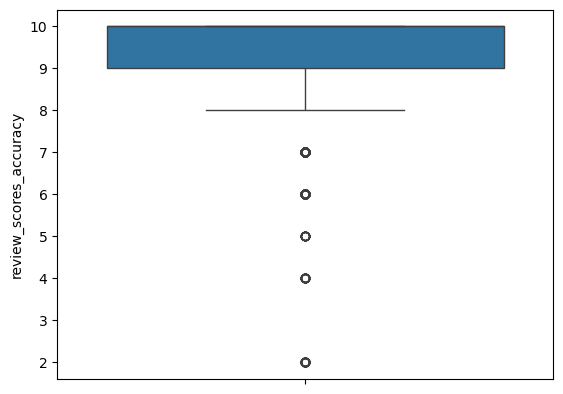

In [287]:
sns.boxplot(
    data=df_apart.query('price < 200'),
    y='review_scores_accuracy'
)



<Axes: ylabel='review_scores_rating'>

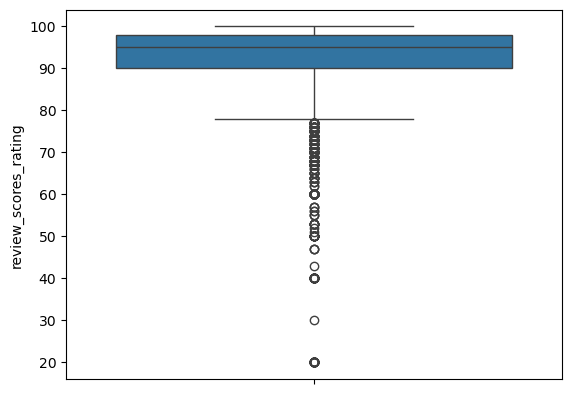

In [288]:
sns.boxplot(
    data=df_apart.query('price < 200'),
    y='review_scores_rating'
)


<Axes: ylabel='review_scores_cleanliness'>

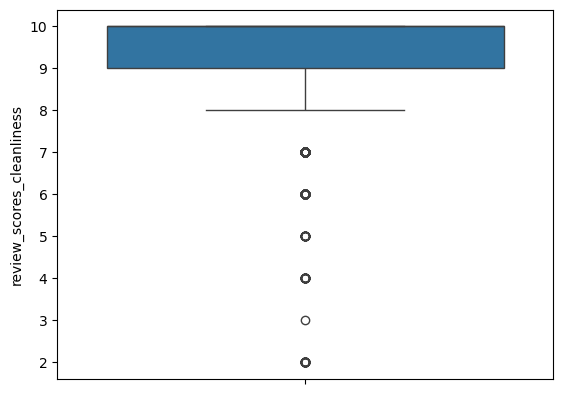

In [289]:
sns.boxplot(
    data=df_apart.query('price < 200'),
    y='review_scores_cleanliness'
)

<Axes: ylabel='review_scores_checkin'>

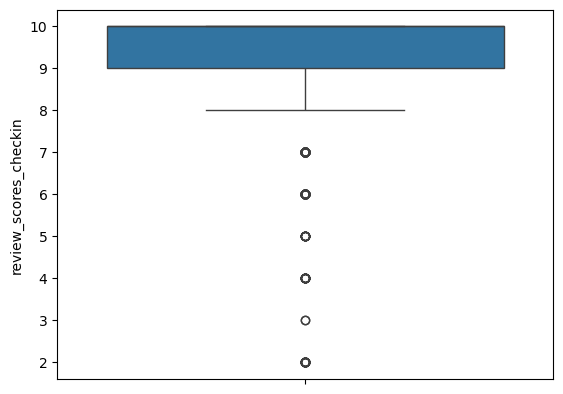

In [290]:
sns.boxplot(
    data=df_apart.query('price < 200'),
    y='review_scores_checkin'
)

<Axes: xlabel='review_scores_rating', ylabel='Count'>

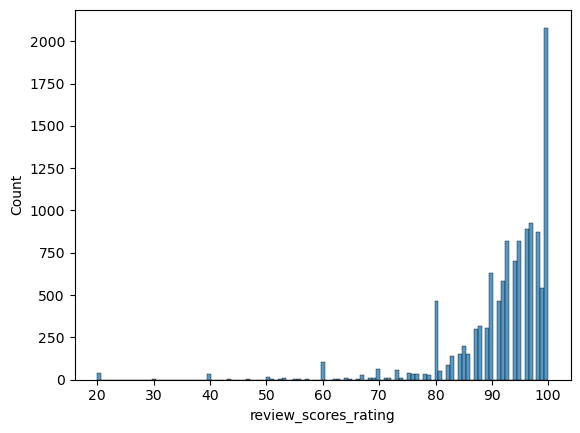

In [291]:
sns.histplot(
    data=df_apart.query('price < 200'),
    x="review_scores_rating",
    bins="auto",  # "auto", 10, 20, 200
)

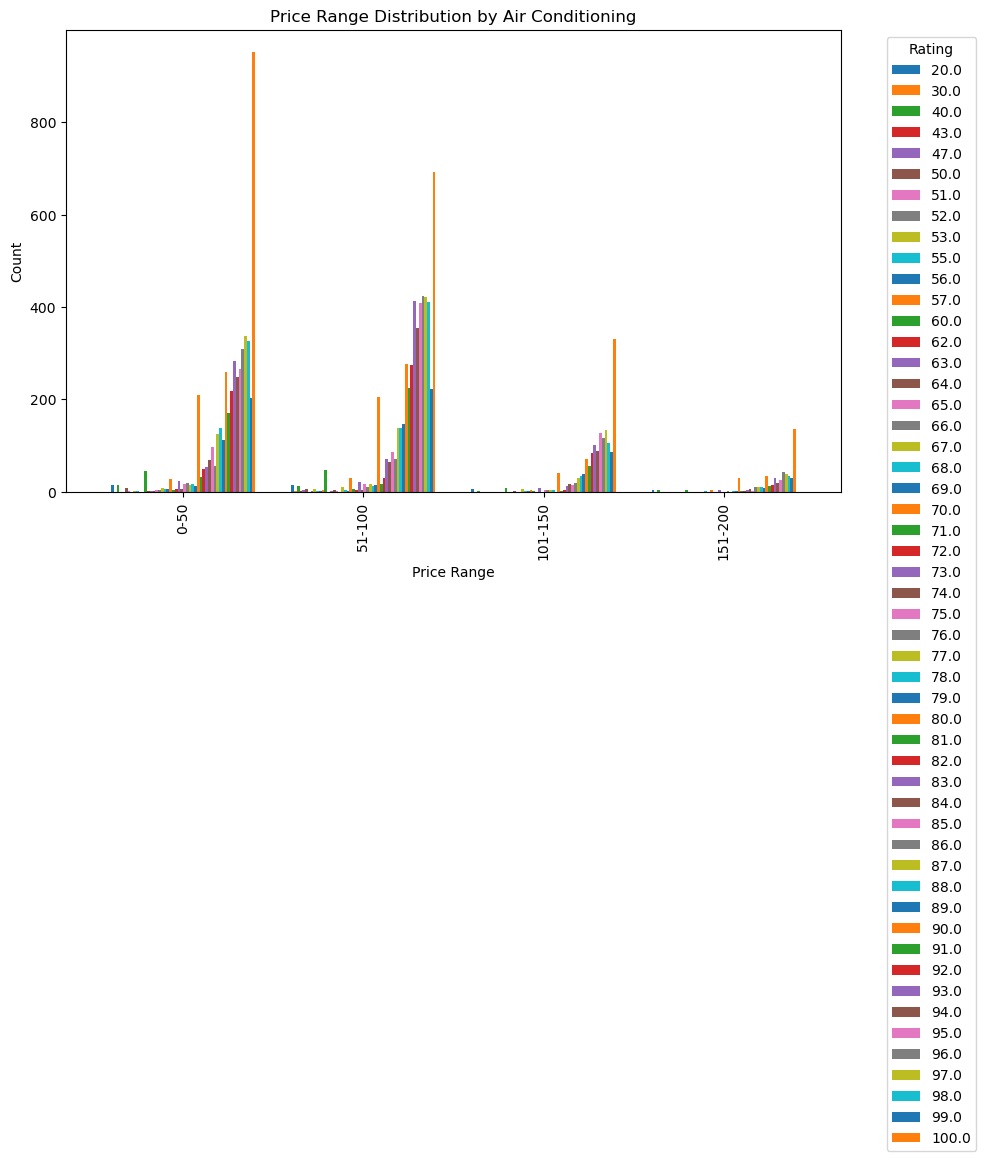

In [292]:
grouped_data = df_apart.groupby('review_scores_rating')['price_range'].value_counts().reset_index(name='counts')


# grouped_data = df_apartamentos.groupby(['amenities_air_conditioning', 'price_range']).size().reset_index(name='counts')

# Step 3: Pivot the DataFrame for easier plotting
pivot_df = grouped_data.pivot(index='price_range', columns='review_scores_rating', values='counts')

# Step 4: Plot the data
pivot_df.plot(kind='bar', figsize=(10, 6), width=0.8)

# Add titles and labels
plt.title('Price Range Distribution by Air Conditioning')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

<Axes: ylabel='price'>

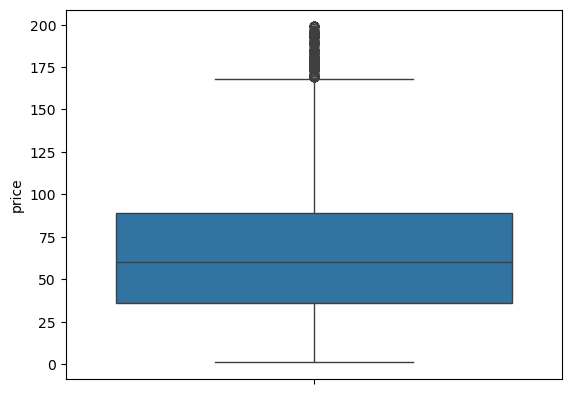

In [293]:
sns.boxplot(
    data=df.query('price < 200'),
    y= 'price'
)

<Axes: xlabel='price_range', ylabel='size'>

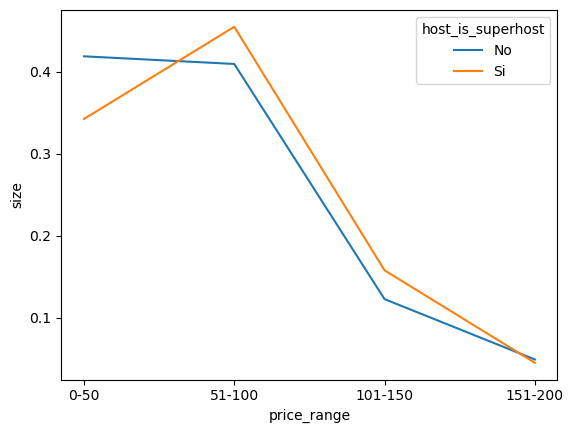

In [303]:
# calcular el número de pelicular favoritas vs no-favoritas por año
df_mod_ = df_apart.groupby(["host_is_superhost", "price_range"], as_index=False).size().replace({0:'No', 1:'Si'})
# relativizar conteos en cada grupo
df_mod_["size"] = df_mod_.groupby("host_is_superhost")["size"].transform(lambda x: x / x.sum())
# lineplot
sns.lineplot(
    data=df_mod_,
    x="price_range",
    y="size",
    hue="host_is_superhost",
    )

<Axes: xlabel='price_range', ylabel='size'>

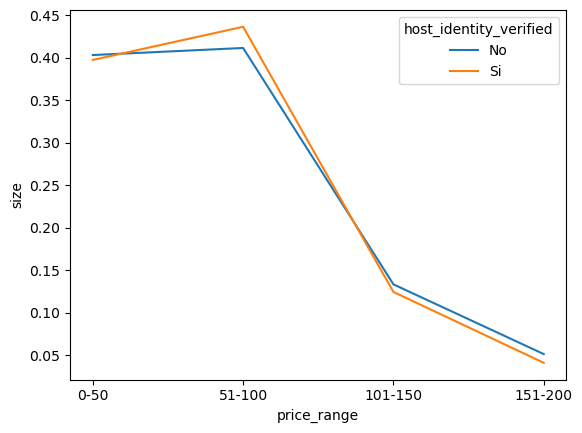

In [304]:
# calcular el número de pelicular favoritas vs no-favoritas por año
df_mod_ = df_apart.groupby(["host_identity_verified", "price_range"], as_index=False).size().replace({0:'No', 1:'Si'})
# relativizar conteos en cada grupo
df_mod_["size"] = df_mod_.groupby("host_identity_verified")["size"].transform(lambda x: x / x.sum())
# lineplot
sns.lineplot(
    data=df_mod_,
    x="price_range",
    y="size",
    hue="host_identity_verified",
    )

<Axes: xlabel='price_range', ylabel='size'>

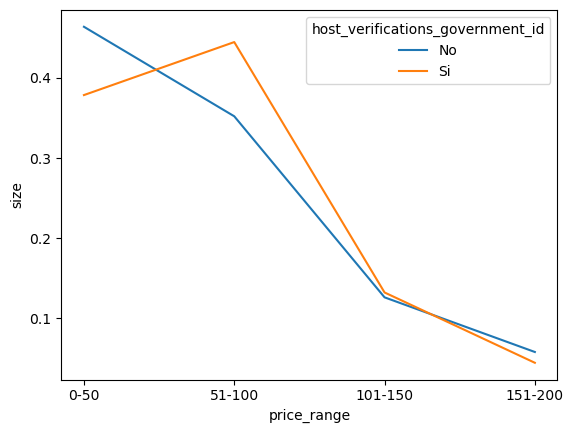

In [305]:
# calcular el número de pelicular favoritas vs no-favoritas por año
df_mod_ = df_apart.groupby(["host_verifications_government_id", "price_range"], as_index=False).size().replace({0:'No', 1:'Si'})
# relativizar conteos en cada grupo
df_mod_["size"] = df_mod_.groupby("host_verifications_government_id")["size"].transform(lambda x: x / x.sum())
# lineplot
sns.lineplot(
    data=df_mod_,
    x="price_range",
    y="size",
    hue="host_verifications_government_id",
    )